In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
from sklearn.cluster import KMeans
# Suppress specific warning
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


df = pd.read_csv("C:/Users/Adebolu/Downloads/Mall_Customers.csv")


In [70]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [71]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Distribution of numerical variables:


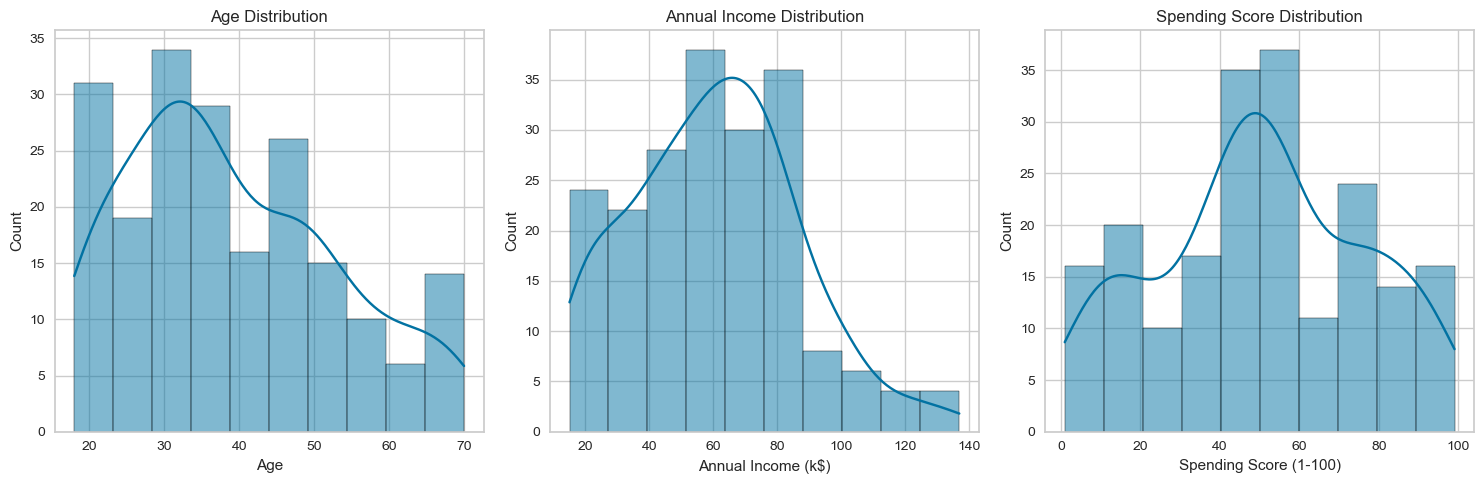

In [73]:
# Distribution of numerical variables
print("\nDistribution of numerical variables:")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Annual Income Distribution')
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()


Countplot for categorical variable (Gender):


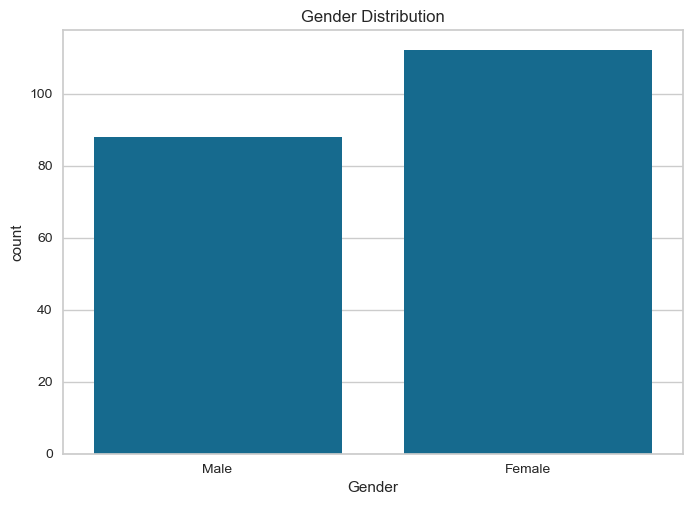

In [74]:
# Countplot for categorical variable (Gender)
print("\nCountplot for categorical variable (Gender):")
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

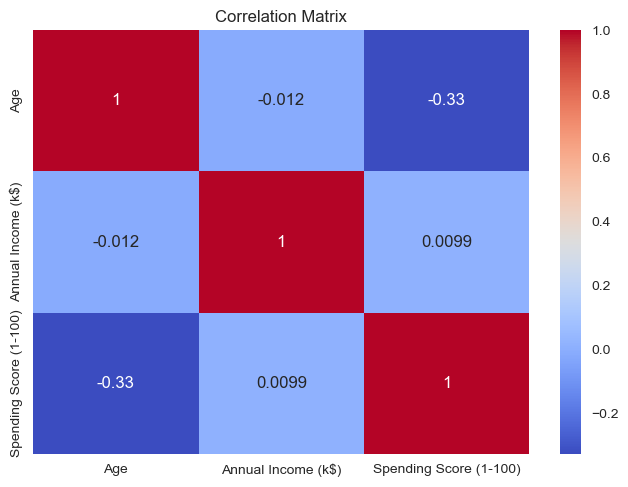

In [75]:
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

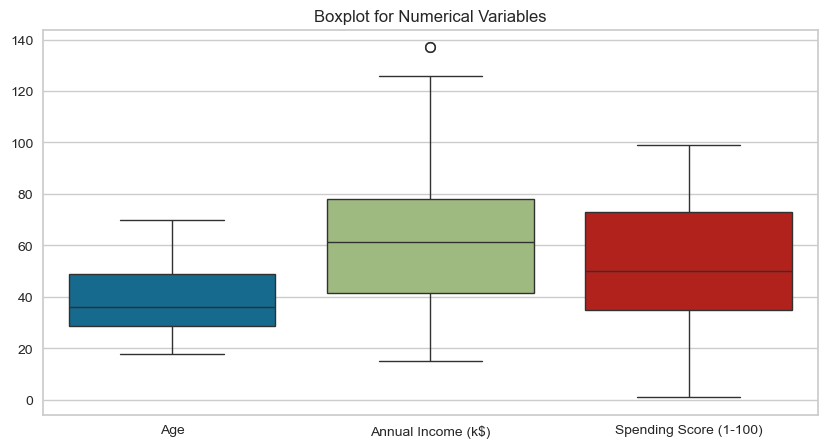

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot for Numerical Variables')
plt.show()

In [77]:
# Identify the outlier
outlier_value = df['Annual Income (k$)'].max()

# Filter the DataFrame to exclude the outlier
df_filtered = df[df['Annual Income (k$)'] != outlier_value]

# Display the filtered DataFrame
print("Filtered DataFrame without the outlier:")
print(df_filtered)

Filtered DataFrame without the outlier:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74

[198 rows x 5 columns]


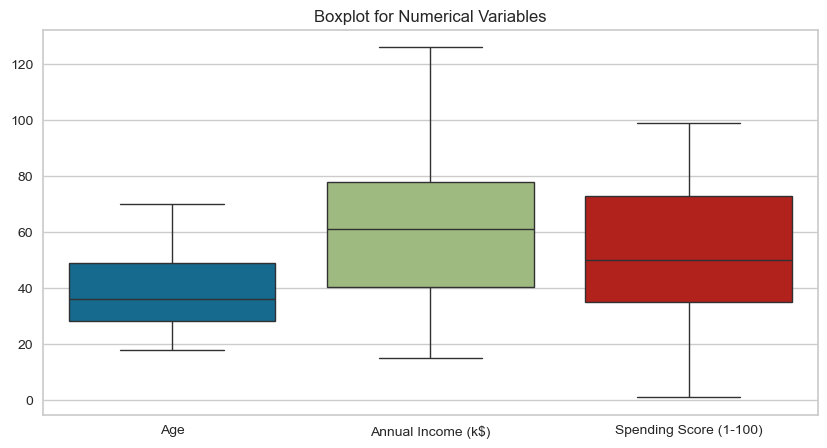

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_filtered[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot for Numerical Variables')
plt.show()

In [79]:
#Use case - customers segmentation^

In [80]:
from sklearn.cluster import KMeans 

In [81]:
X_numerics = df_filtered[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

In [82]:
#In order to find an appropriate number of clusters, the elbow method will be used. 
#In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. 
#The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

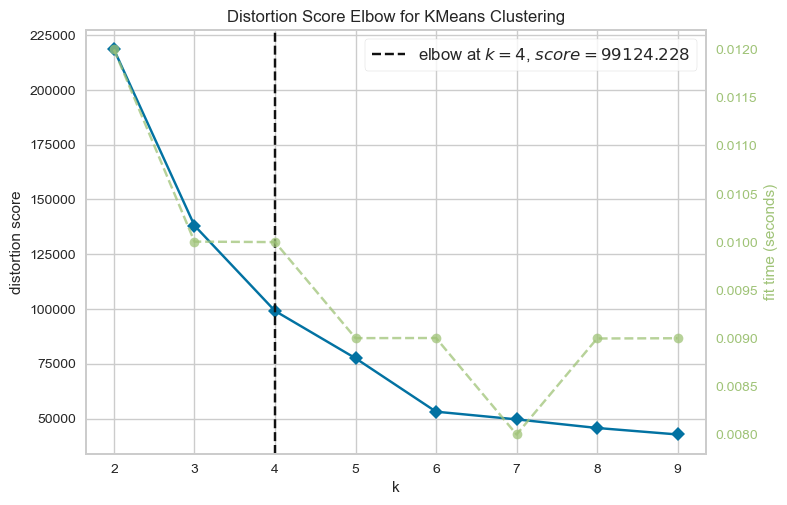

In [83]:
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()